<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#06c4d9;"> AIR BNB SINGAPORE PRICE PREDICTIONS

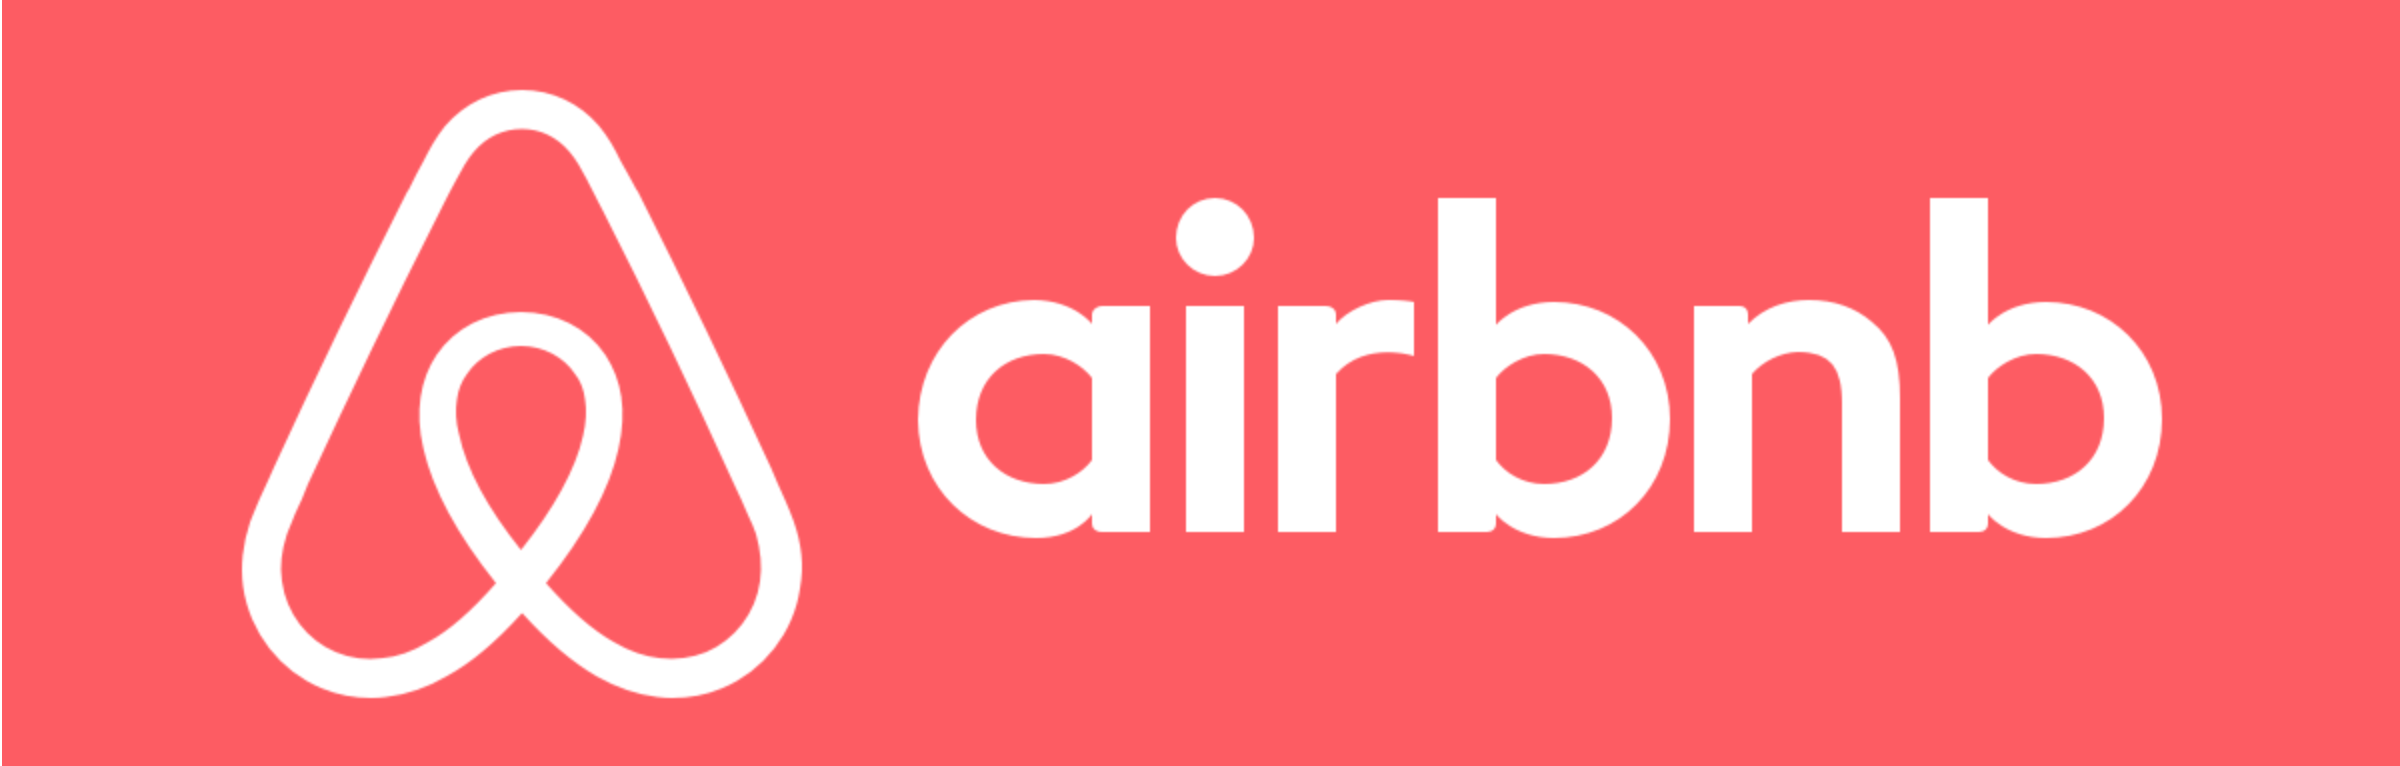

In [12]:
from IPython.display import Image
Image("bnb.png")

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # seaborn and matplot for data visualisation and plotting graphs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',10000)
from scipy import stats

%matplotlib inline

In [2]:
cat = pd.read_csv('categorical_ready_final_for_model.csv')
num = pd.read_csv('num_ready_final_for_model.csv')

In [3]:
print('The shape of categorical dataset is ',cat.shape)
print('The shape of numerical dataset is ',num.shape)

The shape of categorical dataset is  (7549, 10)
The shape of numerical dataset is  (7549, 49)


In [4]:
cat.head()

host_response_time neighbourhood_group_cleansed     room_type bed_type  \
0  within a few hours                 North Region  Private room   common   
1        within a day               Central Region  Private room   common   
2  within a few hours                 North Region  Private room   common   
3  within a few hours                  East Region  Private room   common   
4  within a few hours                  East Region  Private room   common   

  cancellation_policy  host_vintage  amenities_score  verification_score  \
0            flexible        3318.0             1.11                1.22   
1            moderate        3360.0             1.46                1.12   
2            flexible        3318.0             1.00                1.22   
3            moderate        3217.0             1.54                1.00   
4            moderate        3217.0             1.68                1.00   

        neighbourhood_new property_category  
0  less than 100 listings            common  
1  less than 600 listings            common  
2  less than 100 listings            common  
3  less than 100 listings              rare  
4  less than 100 listings          uncommon

In [5]:
num.head()

host_response_rate  host_is_superhost  host_listings_count  \
0               100.0                0.0                  2.0   
1                88.0                0.0                  1.0   
2               100.0                0.0                  2.0   
3               100.0                0.0                  9.0   
4               100.0                0.0                  9.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        2.0                   1.0                     0.0   
1                        1.0                   1.0                     0.0   
2                        2.0                   1.0                     0.0   
3                        9.0                   1.0                     1.0   
4                        9.0                   1.0                     1.0   

    zipcode  latitude  longitude  is_location_exact  accommodates  bathrooms  \
0  730702.0   1.44255  103.79580                1.0           1.0        1.0   
1  589664.0   1.33235  103.78521                1.0           2.0        1.0   
2  307400.8   1.44246  103.79667                1.0           1.0        1.0   
3  488405.0   1.34541  103.95712                1.0           6.0        1.0   
4  488405.0   1.34567  103.95963                1.0           3.0        0.5   

   bedrooms  beds  price  guests_included  extra_people  minimum_nights  \
0       1.0   1.0   83.0              1.0          14.0           180.0   
1       1.0   1.0   80.0              2.0          20.0            90.0   
2       1.0   1.0   69.0              1.0          14.0             6.0   
3       2.0   3.0  204.0              4.0          28.0             1.0   
4       1.0   1.0   94.0              1.0          21.0             1.0   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0           360.0                   180.0                   180.0   
1           730.0                    90.0                    90.0   
2            14.0                     6.0                     6.0   
3          1125.0                     1.0                     1.0   
4          1125.0                     1.0                     1.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                   360.0                   360.0                   180.0   
1                   730.0                   730.0                    90.0   
2                    14.0                    14.0                     6.0   
3                  1125.0                  1125.0                     1.0   
4                  1125.0                  1125.0                     1.0   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                   360.0               1.0             30.0             60.0   
1                   730.0               1.0             29.0             59.0   
2                    14.0               1.0             29.0             59.0   
3                  1125.0               1.0             30.0             60.0   
4                  1125.0               1.0             30.0             60.0   

   availability_90  availability_365  number_of_reviews  \
0             90.0             365.0                1.0   
1             89.0             364.0               18.0   
2             89.0             364.0               20.0   
3             90.0             365.0               15.0   
4             90.0             365.0               22.0   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0                    0.0                  94.0                    10.0   
1                    0.0                  91.0                     9.0   
2                    0.0                  98.0                    10.0   
3                    4.0                  84.0                     8.0   
4                    2.0                  81.0                     8.0   

   review_scores_cleanliness  review_scores_ch

In [6]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(cat)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [8]:
missing_values_table(num)

Your selected dataframe has 49 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [9]:
num.dtypes.value_counts()

float64    49
dtype: int64

In [10]:
cat.dtypes.value_counts()

object     7
float64    3
dtype: int64

## On concating all columns our cleaned dataframe is ready for model now

In [11]:
data = pd.concat([num,cat],axis=1)

In [12]:
print('The shape of BNB dataset after concat is ',data.shape)

The shape of BNB dataset after concat is  (7549, 59)


In [13]:
data.head()

host_response_rate  host_is_superhost  host_listings_count  \
0               100.0                0.0                  2.0   
1                88.0                0.0                  1.0   
2               100.0                0.0                  2.0   
3               100.0                0.0                  9.0   
4               100.0                0.0                  9.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        2.0                   1.0                     0.0   
1                        1.0                   1.0                     0.0   
2                        2.0                   1.0                     0.0   
3                        9.0                   1.0                     1.0   
4                        9.0                   1.0                     1.0   

    zipcode  latitude  longitude  is_location_exact  accommodates  bathrooms  \
0  730702.0   1.44255  103.79580                1.0           1.0        1.0   
1  589664.0   1.33235  103.78521                1.0           2.0        1.0   
2  307400.8   1.44246  103.79667                1.0           1.0        1.0   
3  488405.0   1.34541  103.95712                1.0           6.0        1.0   
4  488405.0   1.34567  103.95963                1.0           3.0        0.5   

   bedrooms  beds  price  guests_included  extra_people  minimum_nights  \
0       1.0   1.0   83.0              1.0          14.0           180.0   
1       1.0   1.0   80.0              2.0          20.0            90.0   
2       1.0   1.0   69.0              1.0          14.0             6.0   
3       2.0   3.0  204.0              4.0          28.0             1.0   
4       1.0   1.0   94.0              1.0          21.0             1.0   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0           360.0                   180.0                   180.0   
1           730.0                    90.0                    90.0   
2            14.0                     6.0                     6.0   
3          1125.0                     1.0                     1.0   
4          1125.0                     1.0                     1.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                   360.0                   360.0                   180.0   
1                   730.0                   730.0                    90.0   
2                    14.0                    14.0                     6.0   
3                  1125.0                  1125.0                     1.0   
4                  1125.0                  1125.0                     1.0   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                   360.0               1.0             30.0             60.0   
1                   730.0               1.0             29.0             59.0   
2                    14.0               1.0             29.0             59.0   
3                  1125.0               1.0             30.0             60.0   
4                  1125.0               1.0             30.0             60.0   

   availability_90  availability_365  number_of_reviews  \
0             90.0             365.0                1.0   
1             89.0             364.0               18.0   
2             89.0             364.0               20.0   
3             90.0             365.0               15.0   
4             90.0             365.0               22.0   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0                    0.0                  94.0                    10.0   
1                    0.0                  91.0                     9.0   
2                    0.0                  98.0                    10.0   
3                    4.0                  84.0                     8.0   
4                    2.0                  81.0                     8.0   

   review_scores_cleanliness  review_scores_ch

In [14]:
data.tail(5)

host_response_rate  host_is_superhost  host_listings_count  \
7544                69.0                0.0                 59.0   
7545                95.0                0.0                  5.0   
7546                99.4                0.0                  1.0   
7547               100.0                0.0                  2.0   
7548                96.0                1.0                 40.0   

      host_total_listings_count  host_has_profile_pic  host_identity_verified  \
7544                       59.0                   1.0                     1.0   
7545                        5.0                   1.0                     0.0   
7546                        1.0                   1.0                     0.0   
7547                        2.0                   1.0                     1.0   
7548                       40.0                   1.0                     0.0   

       zipcode  latitude  longitude  is_location_exact  accommodates  \
7544  218680.0   1.31479  103.85864                1.0           4.0   
7545  219728.0   1.31471  103.84641                1.0           6.0   
7546  238859.0   1.30347  103.83698                1.0           4.0   
7547  250269.2   1.32192  103.86518                1.0           2.0   
7548  160070.0   1.29600  103.82977                1.0           2.0   

      bathrooms  bedrooms  beds  price  guests_included  extra_people  \
7544        1.0       0.0   1.0  105.0              3.0          20.0   
7545        2.0       3.0   3.0  110.0              1.0           0.0   
7546        2.0       3.0   3.0  529.0              1.0           0.0   
7547        1.0       1.0   1.0   69.0              1.0          10.0   
7548        1.0       1.0   1.0  138.0              1.0           0.0   

      minimum_nights  maximum_nights  minimum_minimum_nights  \
7544            15.0          1125.0                    15.0   
7545            90.0          1125.0                    90.0   
7546             3.0          1125.0                     3.0   
7547             6.0          1125.0                     6.0   
7548             2.0          1125.0                     2.0   

      maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
7544                    15.0                  1125.0                  1125.0   
7545                    90.0                  1125.0                  1125.0   
7546                     3.0                  1125.0                  1125.0   
7547                     6.0                  1125.0                  1125.0   
7548                     2.0                  1125.0                  1125.0   

      minimum_nights_avg_ntm  maximum_nights_avg_ntm  has_availability  \
7544                    15.0                  1125.0               1.0   
7545                    90.0                  1125.0               1.0   
7546                     3.0                  1125.0               1.0   
7547                     6.0                  1125.0               1.0   
7548                     2.0                  1125.0               1.0   

      availability_30  availability_60  availability_90  availability_365  \
7544             24.0             54.0             84.0             359.0   
7545             23.0             53.0             83.0             358.0   
7546             24.0             54.0             84.0             174.0   
7547              7.0              7.0             27.0             302.0   
7548              9.0             39.0             69.0             344.0   

      number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
7544                0.0                    0.0                  69.2   
7545                0.0                    0.0                  96.8   
7546                0.0                    0.0                  93.8   
7547                0.0                    0.0                  92.4   
7548                0.0                    0.0                  87.0   

      review_scores_accuracy  r

In [17]:
data.to_csv('model_data.csv')

In [17]:
missing_values_table(data)

Your selected dataframe has 59 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [174]:
corr_matrix = data.corr()

In [175]:
sns.pairplot(data,diag_kind='kde')

In [18]:
df = data.copy()

In [19]:
df.shape

(7549, 59)

### Converting by get dummies

In [20]:
df_dum = pd.get_dummies(df,drop_first=True)

In [21]:
df_dum.shape

(7549, 70)

In [22]:
df_dum.head()

host_response_rate  host_is_superhost  host_listings_count  \
0               100.0                0.0                  2.0   
1                88.0                0.0                  1.0   
2               100.0                0.0                  2.0   
3               100.0                0.0                  9.0   
4               100.0                0.0                  9.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        2.0                   1.0                     0.0   
1                        1.0                   1.0                     0.0   
2                        2.0                   1.0                     0.0   
3                        9.0                   1.0                     1.0   
4                        9.0                   1.0                     1.0   

    zipcode  latitude  longitude  is_location_exact  accommodates  bathrooms  \
0  730702.0   1.44255  103.79580                1.0           1.0        1.0   
1  589664.0   1.33235  103.78521                1.0           2.0        1.0   
2  307400.8   1.44246  103.79667                1.0           1.0        1.0   
3  488405.0   1.34541  103.95712                1.0           6.0        1.0   
4  488405.0   1.34567  103.95963                1.0           3.0        0.5   

   bedrooms  beds  price  guests_included  extra_people  minimum_nights  \
0       1.0   1.0   83.0              1.0          14.0           180.0   
1       1.0   1.0   80.0              2.0          20.0            90.0   
2       1.0   1.0   69.0              1.0          14.0             6.0   
3       2.0   3.0  204.0              4.0          28.0             1.0   
4       1.0   1.0   94.0              1.0          21.0             1.0   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0           360.0                   180.0                   180.0   
1           730.0                    90.0                    90.0   
2            14.0                     6.0                     6.0   
3          1125.0                     1.0                     1.0   
4          1125.0                     1.0                     1.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                   360.0                   360.0                   180.0   
1                   730.0                   730.0                    90.0   
2                    14.0                    14.0                     6.0   
3                  1125.0                  1125.0                     1.0   
4                  1125.0                  1125.0                     1.0   

   maximum_nights_avg_ntm  has_availability  availability_30  availability_60  \
0                   360.0               1.0             30.0             60.0   
1                   730.0               1.0             29.0             59.0   
2                    14.0               1.0             29.0             59.0   
3                  1125.0               1.0             30.0             60.0   
4                  1125.0               1.0             30.0             60.0   

   availability_90  availability_365  number_of_reviews  \
0             90.0             365.0                1.0   
1             89.0             364.0               18.0   
2             89.0             364.0               20.0   
3             90.0             365.0               15.0   
4             90.0             365.0               22.0   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0                    0.0                  94.0                    10.0   
1                    0.0                  91.0                     9.0   
2                    0.0                  98.0                    10.0   
3                    4.0                  84.0                     8.0   
4                    2.0                  81.0                     8.0   

   review_scores_cleanliness  review_scores_ch

In [23]:
# Find all correlations and sort 
correlations_data = df_dum.corr()['price'].sort_values()

# Print the most negative correlations
print(correlations_data.head(10), '\n')

# Print the most positive correlations
print(correlations_data.tail(10))

room_type_Private room                           -0.502822
calculated_host_listings_count_private_rooms     -0.216907
latitude                                         -0.185442
host_vintage                                     -0.169702
zipcode                                          -0.166236
room_type_Shared room                            -0.135088
property_category_uncommon                       -0.131613
calculated_host_listings_count_shared_rooms      -0.126170
neighbourhood_group_cleansed_North-East Region   -0.121411
host_identity_verified                           -0.118549
Name: price, dtype: float64 

cancellation_policy_strict_14_with_grace_period    0.196393
extra_people                                       0.254587
beds                                               0.288463
bedrooms                                           0.492083
guests_included                                    0.565848
accommodates                                       0.602944
price               

### Assumptions for LR

## Base Model check using Decision Tree Regression

### 1. Linear Regression (Base model)

In [29]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('price',axis=1)
y = df_dum.price

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =123)

print( 'Shape of X_train',X_train.shape)
print( 'Shape of X_test',X_test.shape)
print( 'Shape of y_train',y_train.shape)
print( 'Shape of y_test',y_test.shape)

Shape of X_train (6039, 69)
Shape of X_test (1510, 69)
Shape of y_train (6039,)
Shape of y_test (1510,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
lr = LinearRegression()

In [32]:
lr_model = lr.fit(X_train,y_train)

In [33]:
lr_pred = lr.fit(X_train,y_train).predict(X_test)

In [34]:
## training accuracy test-
lr_pred_train = lr.fit(X_train,y_train).predict(X_train)
print("Training r2 Score", r2_score(lr_pred_train,y_train))

Training r2 Score 0.4513252796028947


In [35]:
print("Test r2 Score:",r2_score(lr_pred,y_test))

Test r2 Score: 0.4807373759567124


In [36]:
print("RMSE on  training:",np.sqrt(mean_squared_error(lr_pred_train,y_train)))

RMSE on  training: 61.09105291198036


In [37]:
print("RMSE on test:", np.sqrt(mean_squared_error(lr_pred,y_test)))

RMSE on test: 59.12421123939982


### Residual plot

In [45]:
residual= y_test-lr_pred

In [46]:
X.shape

(7549, 69)

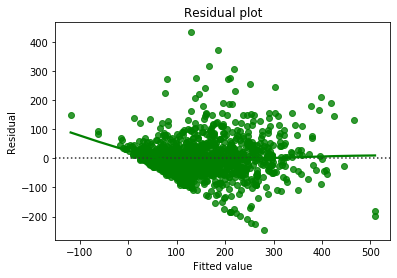

In [48]:
sns.residplot(x= lr_pred, y = residual,color = 'g',lowess=True)
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

**NO pattern in residual plot**

### b.Multicollinearity Check

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(df_dum.values, i) for i in range(df_dum.shape[1])]

pd.DataFrame({"vif":vif[0:]}, index = df_dum.columns).T

host_response_rate  host_is_superhost  host_listings_count  \
vif            2.410547           1.537953                  inf   

     host_total_listings_count  host_has_profile_pic  host_identity_verified  \
vif                        inf              1.012257                1.348923   

      zipcode  latitude  longitude  is_location_exact  accommodates  \
vif  3.400388  6.291973   5.165261            1.06488      4.025323   

     bathrooms  bedrooms      beds     price  guests_included  extra_people  \
vif   1.616539  2.048344  2.398984  2.832447         2.421663      1.260199   

     minimum_nights  maximum_nights  minimum_minimum_nights  \
vif      116.671298      307.873428               47.529023   

     maximum_minimum_nights  minimum_maximum_nights  maximum_maximum_nights  \
vif              204.068837              364.028302             6464.243096   

     minimum_nights_avg_ntm  maximum_nights_avg_ntm  has_availability  \
vif              224.105292             6690.063861      2.919816e+07   

     availability_30  availability_60  availability_90  availability_365  \
vif        14.666283        73.999577        42.140067          2.598053   

     number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
vif           3.070954                4.51276              5.505083   

     review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
vif                3.892844                   2.833235               2.824679   

     review_scores_communication  review_scores_location  review_scores_value  \
vif                     3.448351                 2.11048             3.802697   

     requires_license  instant_bookable  is_business_travel_ready  \
vif               NaN          1.393065                       NaN   

     require_guest_profile_picture  require_guest_phone_verification  \
vif                       5.288386                          5.342664   

     calculated_host_listings_count  \
vif                       62.487565   

     calculated_host_listings_count_entire_homes  \
vif                                    45.608882   

     calculated_host_listings_count_private_rooms  \
vif                                      6.185337   

     calculated_host_listings_count_shared_rooms  reviews_per_month  \
vif                                     1.992457           2.950914   

     host_vintage  amenities_score  verification_score  \
vif      1.560131         1.255797            1.137909   

     host_response_time_within a day  host_response_time_within a few hours  \
vif                         4.511987                               7.894152   

     host_response_time_within an hour  \
vif                          11.347634   

     neighbourhood_group_cleansed_East Region  \
vif                                  2.604067   

     neighbourhood_group_cleansed_North Region  \
vif                                   2.553657   

     neighbourhood_group_cleansed_North-East Region  \
vif                                        2.083228   

     neighbourhood_group_cleansed_West Region  room_type_Hotel room  \
vif                                  3.612438              1.906842   

     room_type_Private room  room_type_Shared room  bed_type_rare  \
vif                 2.28406               1.975621       1.030401   

     cancellation_policy_moderate  cancellation_policy_others  \
vif                      1.709328                    1.064755   

     cancellation_policy_strict_14_with_grace_period  \
vif                                         2.102204   

     neighbourhood_new_less than 600 listings  \
vif                                  5.515526   

     neighbourhood_new_more than 600 listings  property_category_rare  \
vif                                  5.407727                1.161891   

     property_category_uncommon  
vif                    1.415711

### Multicollinearity Check

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

-- > Steps for Implementing VIF

**Calculate the VIF factors.**


**Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.**

In [50]:
import statsmodels.stats.api as sms

sms.het_goldfeldquandt(residual,X_test)

(0.9442010017567353, 0.7744934994755892, 'increasing')

### Autocorrelation

In [36]:
import statsmodels.stats as sts

sts.stattools.durbin_watson(residual)

1.9472815750308865

### Linearirty Rainbow test

    H0: The Residuals are Linear
    H1: The Residuals are Nonliner

In [54]:
import statsmodels.api as sma

import statsmodels.formula.api as smf
#X_train["constant"]=1
model = smf.OLS(endog=y_train, exog=X_train).fit()
teststats,pvalue=sma.stats.diagnostic.linear_rainbow(model)

AttributeError: module 'statsmodels.formula.api' has no attribute 'OLS'

In [57]:
#X_train.drop('constant',axis=1,inplace=True)

##  Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=10)
m = tree_reg.fit(X_train, y_train).predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = tree_reg.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R-Square of the prediction.:" ,model_score)

coefficient of determination R-Square of the prediction.: 0.6616030011815548


In [61]:
y_pred = tree_reg.predict(X_test)

# The mean squared error
print("RMSE is: %.2f"% np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE is: 59.99


In [62]:
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_pred))

Test Variance score: 0.64


**Model parameters study**

### R-Square
* R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

* The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

* R-squared = Explained variation / Total variation

* R-squared is always between 0 and 100%:

* 0% indicates that the model explains none of the variability of the response data around its mean.
* 100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.

* The coefficient R^2 is defined as (1 – u/v), where u is the residual sum of squares ((y_true – y_pred) ** 2).sum() and v is the total sum of squares ((y_true – y_true.mean()) ** 2).sum().

### RMSE

* MSE is the average of the squared error that is used as the loss function for least squares regression: 
* It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points. RMSE is the square root of MSE.
* RMSE is an absolute measure of fit. Lower values of RMSE indicate better fit.

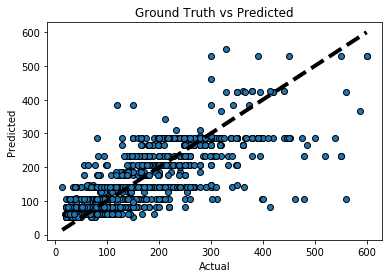

In [63]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Using Grid search CV

In [64]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:   22.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 

In [65]:
model_cv =grid_search_cv.score(X_train, y_train)

In [66]:
y_cv_pred = grid_search_cv.predict(X_test)

In [67]:
print("coefficient of determination R^2 of the Grid CV prediction.:" ,model_cv)

coefficient of determination R^2 of the Grid CV prediction.: 0.7382101592715359


In [68]:
# The mean squared error
print("Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, y_cv_pred)))

Mean squared error: 57.05


In [69]:
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_cv_pred))

Test Variance score: 0.67


## Random Forest Regressor & Feature Selection

In [70]:
from sklearn.ensemble import RandomForestRegressor


In [71]:
regr = RandomForestRegressor(max_depth=5, random_state=123, n_estimators=100)

In [72]:
regr.fit(X, y) # for feature importance

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [73]:
print(regr.feature_importances_)

[1.84752435e-03 1.81889612e-04 3.78750874e-03 3.27955099e-03
 0.00000000e+00 1.29662515e-03 2.60730598e-02 1.18444448e-02
 1.04379701e-02 1.21069081e-04 1.11437023e-01 3.34333965e-03
 6.01368961e-01 1.98835544e-02 1.30081031e-02 3.43569135e-02
 6.91269102e-04 4.12903464e-04 5.49492251e-04 7.61470872e-04
 3.27267431e-04 1.13852622e-04 4.79445383e-04 7.32232023e-05
 0.00000000e+00 3.56434683e-04 6.08174931e-04 8.51423302e-04
 1.23387513e-03 1.05664151e-03 1.31236349e-04 2.45917722e-03
 2.23324011e-04 5.59977322e-04 2.36859523e-04 9.53934370e-05
 4.23395254e-04 2.43421055e-04 0.00000000e+00 1.23067624e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.53604240e-03
 2.47357861e-02 5.48234614e-02 1.66996050e-02 3.30557710e-03
 3.02782720e-03 1.32931785e-03 2.20475063e-03 0.00000000e+00
 3.11443949e-04 2.85504854e-04 6.18520489e-04 2.38429152e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.22832356e-02
 0.00000000e+00 0.00000000e+00 9.83844482e-05 3.91330148e-03
 6.06669520e-05 5.392682

In [207]:
FeatI = pd.DataFrame({'feature': list(x.columns), 'importance': list(regr.feature_importances_)}).sort_values('importance', ascending = False)
FeatI[0:30]

feature  importance
12                                      bedrooms    0.601369
10                                  accommodates    0.111437
45  calculated_host_listings_count_private_rooms    0.054823
15                                  extra_people    0.034357
59                        room_type_Private room    0.032283
6                                        zipcode    0.026073
44   calculated_host_listings_count_entire_homes    0.024736
13                                          beds    0.019884
46   calculated_host_listings_count_shared_rooms    0.016700
14                               guests_included    0.013008
7                                       latitude    0.011844
8                                      longitude    0.010438
63                    cancellation_policy_others    0.003913
2                            host_listings_count    0.003788
11                                     bathrooms    0.003343
47                             reviews_per_month    0.003306
3                      host_total_listings_count    0.003280
48                                  host_vintage    0.003028
31                          review_scores_rating    0.002459
50                            verification_score    0.002205
0                             host_response_rate    0.001848
43                calculated_host_listings_count    0.001536
49                               amenities_score    0.001329
5                         host_identity_verified    0.001297
28                              availability_365    0.001234
29                             number_of_reviews    0.001057
27                               availability_90    0.000851
19                        maximum_minimum_nights    0.000761
16                                minimum_nights    0.000691
54      neighbourhood_group_cleansed_East Region    0.000619

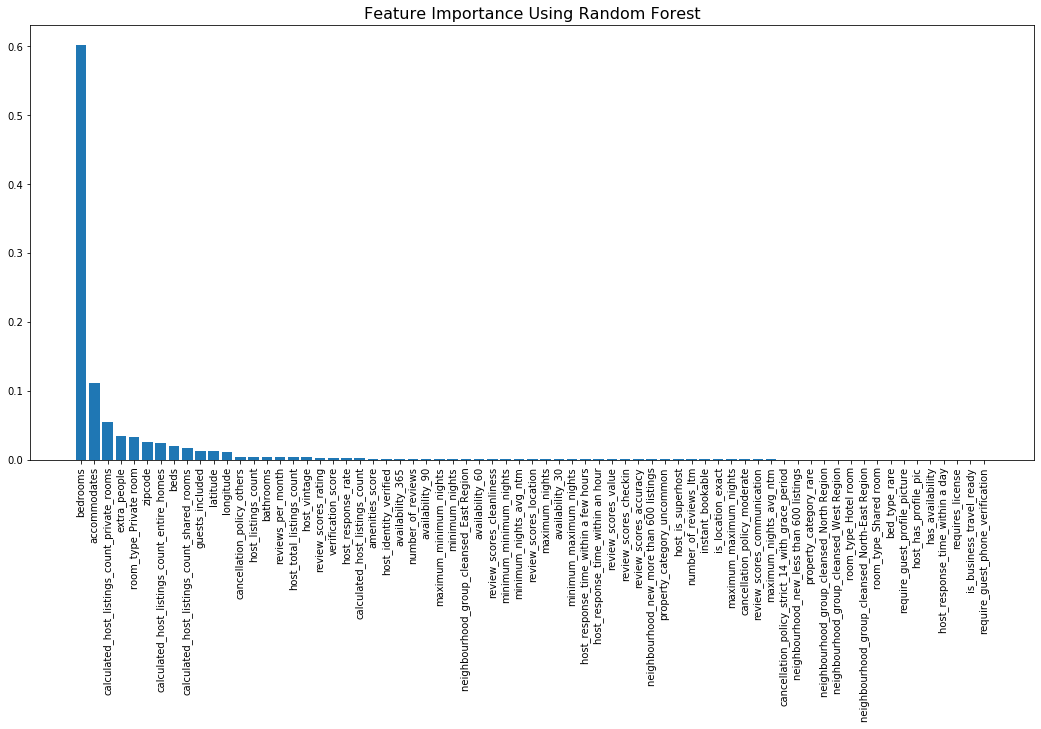

In [217]:
plt.figure(figsize=(18,8))
plt.bar(FeatI.feature,FeatI.importance)
plt.title('Feature Importance Using Random Forest', size=16)
plt.xticks(FeatI.index,rotation='vertical')
plt.show()

In [78]:
rf_reg =RandomForestRegressor(bootstrap= True, max_depth= 5, max_features= None, max_leaf_nodes= 20, n_estimators= 100)

In [79]:
y_rfe_pred = rf_reg.fit(X_train,y_train).predict(X_test) # RF model predictions

In [86]:
rf_model_score = rf_reg.score(X_train,y_train)

In [85]:
print("coefficient of determination R^2 of the RandomForest prediction.:" ,rf_model_score)

# The mean squared error
print("Mean squared errorfor RandomForest: %.2f"% np.sqrt(mean_squared_error(y_test, y_rfe_pred)))

coefficient of determination R^2 of the RandomForest prediction.: 0.6868498709246036
Mean squared errorfor RandomForest: 56.34


In [82]:
# Explained variance score: 1 is perfect prediction
print('Test Variance score for RandomForest: %.2f' % r2_score(y_test, y_rfe_pred))

Test Variance score for RandomForest: 0.68


In [106]:
cluster_data=df_dum.drop('price',axis=1)

#cluster_data

In [107]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()
cluster_scaled = preprocessing.scale(cluster_data)
pcaResults = pca.fit(cluster_scaled)

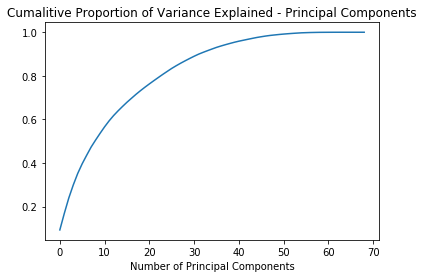

In [108]:
plt.plot(np.cumsum(pcaResults.explained_variance_ratio_))
plt.title('Cumalitive Proportion of Variance Explained - Principal Components')
plt.xlabel('Number of Principal Components')
plt.show()

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x=cluster_data
y=df_dum['price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

tunedParameters=[{'n_estimators':range(50,100,10)}]
clf=GridSearchCV(RandomForestRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf.fit(x, y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.723 (+/-0.128) for {'n_estimators': 50}
0.719 (+/-0.127) for {'n_estimators': 60}
0.722 (+/-0.129) for {'n_estimators': 70}
0.728 (+/-0.127) for {'n_estimators': 80}
0.727 (+/-0.129) for {'n_estimators': 90}


In [110]:
from sklearn.ensemble import ExtraTreesRegressor
clf1=GridSearchCV(ExtraTreesRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf1.fit(x, y)

means = clf1.cv_results_['mean_test_score']
stds = clf1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.729 (+/-0.134) for {'n_estimators': 50}
0.733 (+/-0.128) for {'n_estimators': 60}
0.735 (+/-0.128) for {'n_estimators': 70}
0.732 (+/-0.133) for {'n_estimators': 80}
0.734 (+/-0.130) for {'n_estimators': 90}


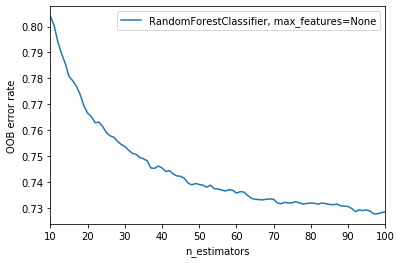

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [112]:
x=cluster_data
y=df_dum['price']
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
ensemble_clfs = [("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(x, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

from sklearn.ensemble import RandomForestRegressor

x=cluster_data
y=df_dum['price']
tunedParameters = [{'n_estimators':100}]

clf2 = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=100)
#Fit Model
clf2.fit(x, y)

In [113]:
FeatImp = pd.DataFrame({'feature': list(x.columns), 'importance': list(clf2.feature_importances_)})
FeatImp = FeatImp.sort_values('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')
FeatImp.head(100)
FeatImp.to_csv('feature_imp.csv')

In [114]:
FeatImp.index[0:30]

Index(['bedrooms', 'accommodates', 'extra_people',
       'calculated_host_listings_count_private_rooms', 'zipcode', 'latitude',
       'longitude', 'room_type_Private room',
       'calculated_host_listings_count_entire_homes', 'beds',
       'guests_included', 'host_vintage', 'reviews_per_month',
       'calculated_host_listings_count_shared_rooms', 'amenities_score',
       'availability_365', 'bathrooms', 'verification_score',
       'host_response_rate', 'review_scores_rating',
       'host_total_listings_count', 'host_listings_count', 'availability_90',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_60', 'review_scores_location', 'maximum_minimum_nights',
       'review_scores_cleanliness', 'availability_30'],
      dtype='object', name='feature')

In [115]:
FeatImp['importance'].values[0:30]

array([0.40895454, 0.09111418, 0.04003012, 0.03964856, 0.03753267,
       0.02905708, 0.02706225, 0.02542488, 0.02490089, 0.02296308,
       0.01654597, 0.01624181, 0.01442401, 0.0132312 , 0.01295525,
       0.01211454, 0.01050144, 0.01033275, 0.01017365, 0.00985517,
       0.00778092, 0.00761608, 0.00748349, 0.00706599, 0.00600511,
       0.00584318, 0.00563977, 0.00512532, 0.00511959, 0.00477525])

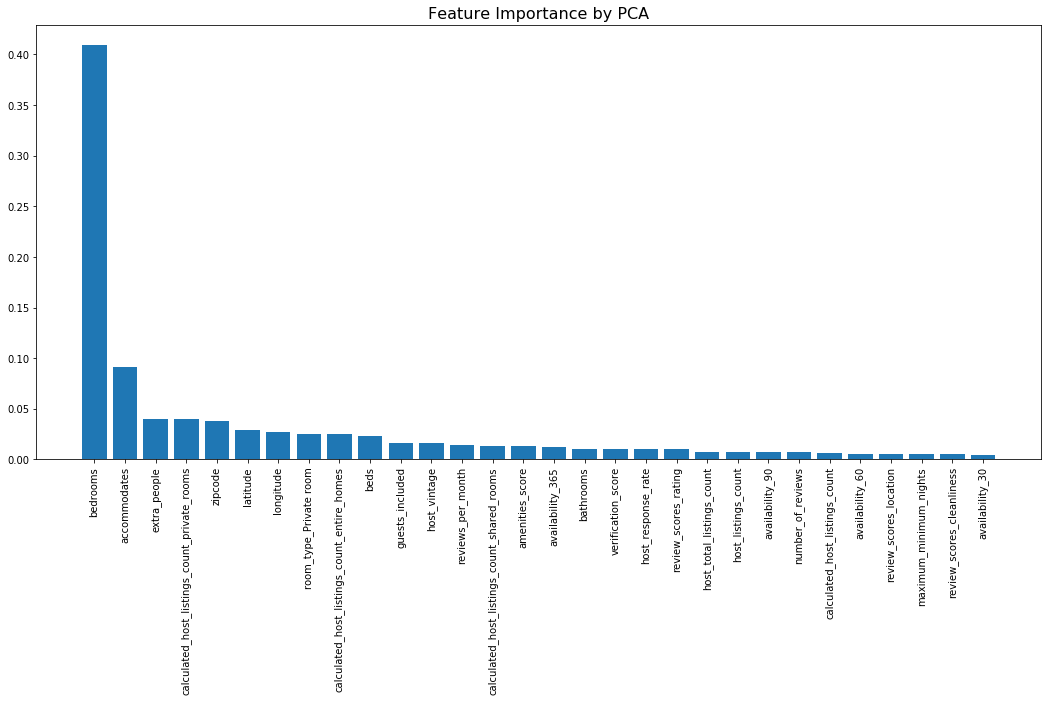

In [219]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))

plt.title("Feature Importance by PCA",size=16)
y_pos = np.arange(len(FeatImp.index[0:30]))
plt.bar(y_pos,FeatImp['importance'].values[0:30])
plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
plt.show()

## After PCA Feature selection

In [120]:
x_pca = X[['bedrooms', 'accommodates', 'extra_people',
       'calculated_host_listings_count_private_rooms', 'zipcode', 'latitude',
       'longitude', 'room_type_Private room',
       'calculated_host_listings_count_entire_homes', 'beds',
       'guests_included', 'host_vintage', 'reviews_per_month',
       'calculated_host_listings_count_shared_rooms', 'amenities_score',
       'availability_365', 'bathrooms', 'verification_score',
       'host_response_rate', 'review_scores_rating',
       'host_total_listings_count', 'host_listings_count', 'availability_90',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_60', 'review_scores_location', 'maximum_minimum_nights',
       'review_scores_cleanliness', 'availability_30']]

In [121]:
y = df_dum.price

In [133]:
xtrain_p,xtest_p,ytrain_p,ytest_p = train_test_split(x_pca,y, test_size=0.2, random_state =10)

In [142]:
print('xtrain_p',xtrain_p.shape)
print('xtest_p',xtest_p.shape)
print('ytrain_p',ytrain_p.shape)
print('ytest_p',ytest_p.shape)

xtrain_p (6039, 30)
xtest_p (1510, 30)
ytrain_p (6039,)
ytest_p (1510,)


In [162]:
rf_pca =RandomForestRegressor(max_depth=5, random_state=10, n_estimators=150)

In [163]:
rf_pca_pred = rf_pca.fit(xtrain_p,ytrain_p).predict(xtest_p) # RF model predictions

In [164]:
rf_model_score = rf_pca.score(xtrain_p,ytrain_p)

print("coefficient of determination R^2 of the RandomForest prediction.:" ,rf_model_score)

coefficient of determination R^2 of the RandomForest prediction.: 0.7039370599515333


In [165]:
ypca_train_rf = rf_pca.fit(xtrain_p,ytrain_p).predict(xtrain_p)
print("Training r2 score:", r2_score(ytrain_p,ypca_train_rf))
print("Training rmse:",np.sqrt(mean_squared_error(ytrain_p,ypca_train_rf)))



Training r2 score: 0.7039370599515333
Training rmse: 55.84602459242382


In [166]:
ypred_rf = rf_pca.fit(xtrain_p,ytrain_p).predict(xtest_p)
print("Test r2 score:", r2_score(ytest_p,ypred_rf))
print("Test rmse:",np.sqrt(mean_squared_error(ytest_p,ypred_rf)))

Test r2 score: 0.6873043289228001
Test rmse: 55.69113575262551
